In [1]:
# Import Necessary Libraries

In [2]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams
from   datetime                           import  datetime, timedelta
from sklearn.metrics                      import mean_squared_error
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima.model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import Dataset

In [4]:
df = pd.read_excel('Case_Study_2.xlsx')
df.head()

,Date,Tractor sales,GDP,"Agriculture,forestry & fishing",Seasonality,CPI General Index,M1 Rs. Million,M3 Rs. Million,Per capita GDP,Repo Rate,Purchase of Finish goods.,Foodgrains,Cereals,Pulses,Mechanization,Actual_rainfall,Deviation_from_Normal,Kharif_prices,IMD_LPA%
0,2005-03-01,65845,8836970.0,1484010.0,1.193914,105.0,6497660.0,22456530.0,29259.3,0.0630,4664.1,1651.95,1903.44,576.8,18,1132.0,-4.51,560,99.47
1,2005-06-01,66941,8192260.0,1394040.0,0.900000,110.0,8263890.0,27194930.0,32840.2,0.0625,4603.9,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
2,2005-09-01,61126,8220920.0,1130230.0,0.972246,116.6,8263890.0,27194930.0,32840.2,0.0625,3081.7,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
3,2005-12-01,81410,9266960.0,1857500.0,0.967608,118.9,8263890.0,27194930.0,32840.2,0.0625,2747.8,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
4,2006-03-01,83395,9752300.0,1563090.0,1.193914,119.0,8263890.0,27194930.0,32840.2,0.0625,2142.8,1715.48,1967.75,597.8,21,1190.2,0.40,570,99.37


In [5]:
# Consider Date & Tractor sales for analysis

In [6]:
df2 = df[['Date','Tractor sales']]
df2.head()

,Date,Tractor sales
0,2005-03-01,65845
1,2005-06-01,66941
2,2005-09-01,61126
3,2005-12-01,81410
4,2006-03-01,83395


In [7]:
df2.tail()

,Date,Tractor sales
64,2021-03-01,267503
65,2021-06-01,256093
66,2021-09-01,247042
67,2021-12-01,258003
68,2022-03-01,209777


In [8]:
# Dataset has 69 records from March 2005 to March 2022. Time series given has quarterly frequency.

In [9]:
# Generating Timestamp column accordingly to dataset

In [10]:
quarters= pd.date_range(start='2/01/2005', end='4/01/2022', freq='Q')
quarters

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [11]:
# Creating Time_Stamp column with quarters

In [12]:
df2['Time_Stamp']=pd.DataFrame(quarters)

In [13]:
df2.head()

,Date,Tractor sales,Time_Stamp
0,2005-03-01,65845,2005-03-31
1,2005-06-01,66941,2005-06-30
2,2005-09-01,61126,2005-09-30
3,2005-12-01,81410,2005-12-31
4,2006-03-01,83395,2006-03-31


In [14]:
# Dropping Date column since we have Time_Stamp & set index to Time_Stamp

In [15]:
df2.drop(['Date'],axis=1,inplace=True)
df2=df2.set_index('Time_Stamp')
df2.head()

,Tractor sales
Time_Stamp,
2005-03-31,65845
2005-06-30,66941
2005-09-30,61126
2005-12-31,81410
2006-03-31,83395


In [16]:
# Renaming Tractor sales to Tractor_sales

In [17]:
df2.rename(columns = {'Tractor sales':'Tractor_sales'}, inplace = True)

In [18]:
# Plot graph for Tractor_sales

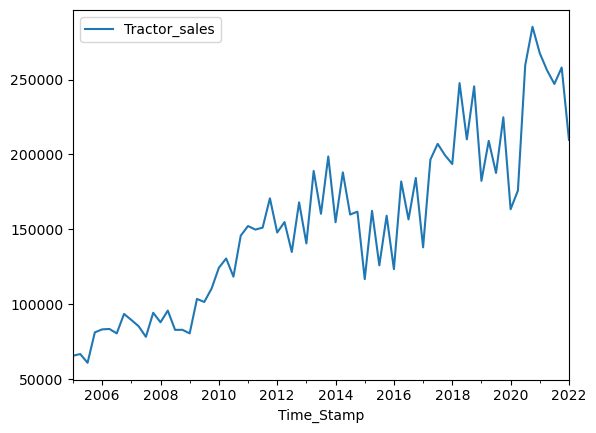

In [19]:
df2.plot()
plt.show()

In [20]:
# From the graph, we can say that tractor sales has increasing trend.
# Tractor sales achieved its peak in yeaar 2021.


In [21]:
# Decompose the time series multiplicatively

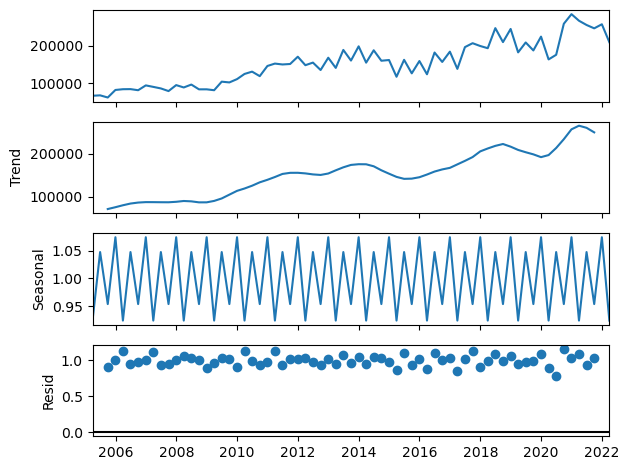

In [22]:
df2_mul_decompose = seasonal_decompose(df2, model = "multiplicative",period=4)
df2_mul_decompose.plot()
plt.show()

In [23]:
# From these graphs, we can say that trend component is not so smooth . There are ups & downs.
# period = 4 means there are 4 quaters in a year.

## Stationarity test

In [24]:
# Adfuller test tells us whether time series in stationary.

In [25]:
adfuller(df2['Tractor_sales'].values)

(-0.4677685372748559,
 0.8981542700767603,
 11,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 1304.1396576238662)

In [26]:
# Hypothesis Testing for Adfuller test

# H0 : p value < 0.05 . Time series is stationary

# H1 :p value > 0.05 . Time series is non-stationary

In [27]:
# Result of adfuller test .
# Second row shows p-value which is greater than 0.05, hence we fail to reject null hypothesis. So, series is non-stationary

In [28]:
# First Order differncing i.e. differencing by 1 . So

In [29]:
df_diff = df2.diff(periods=1).dropna()
adfuller(df_diff['Tractor_sales'].values)

(-2.9528617273437945,
 0.03953721307886034,
 10,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 1280.7282376307023)

In [30]:
# Second row shows p-value which is less than 0.05, hence we reject null hypothesis. So, series is stationary

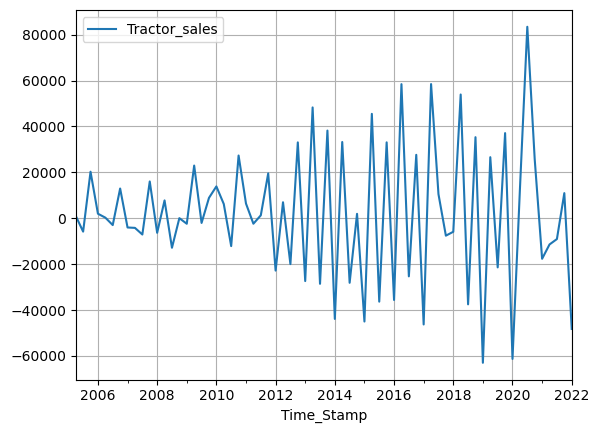

In [31]:
df_diff.plot(grid= True)
plt.show()

In [32]:
# From df_diff graph, we can say that from 2005 to 2012 tractor sales didn't vary much but from 2012 to 2022 tractor sales
# is varying a lot compared to previous record

## ACF-PACF

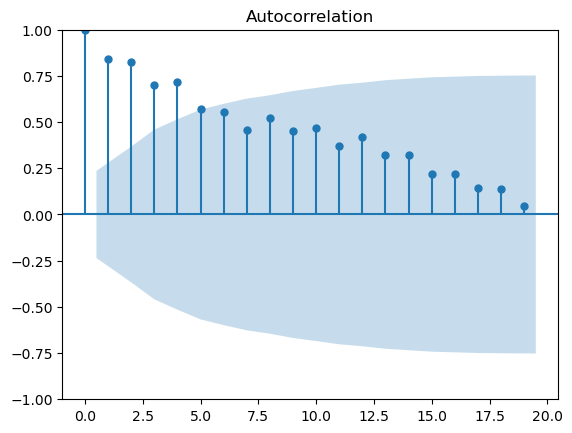

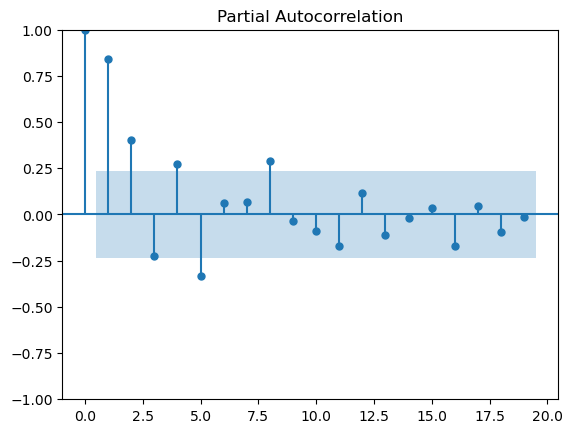

In [33]:
plot_acf(df2);
plot_pacf(df2);

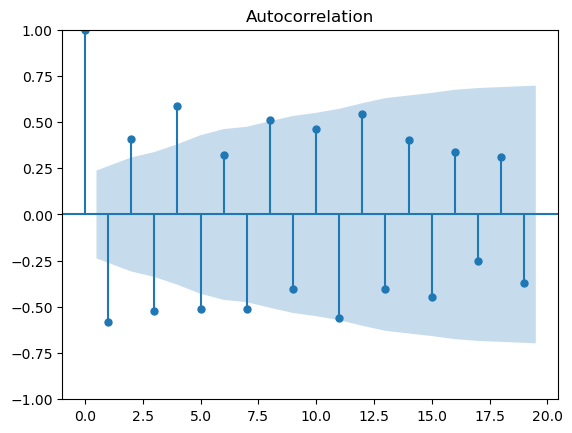

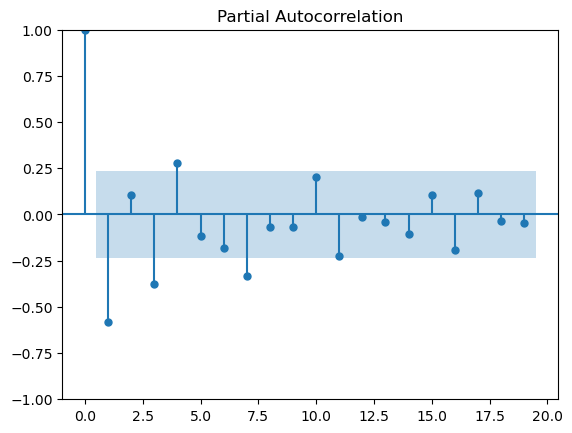

In [34]:
plot_acf(df_diff);
plot_pacf(df_diff);

In [35]:
# From these plot , to predict future t , t-1 to t-8 past values are required

In [36]:
# Train test split

In [37]:
# train data from March 2012 to March 2019

In [38]:
# test data from June 2019 to March 2022

In [39]:
train_start = datetime(2012,3,31)
train_end= datetime(2019,3,31)
test_start = datetime(2019,6,30)
test_end= datetime(2022,3,31)

In [40]:
train = df2[train_start:train_end]
test  = df2[test_start:test_end]

In [41]:
train.shape

(29, 1)

In [42]:
test.shape

(12, 1)

# ARIMA

In [43]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [44]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [45]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:670.7266475386814
ARIMA(0, 1, 1) - AIC:664.8344705801816
ARIMA(0, 1, 2) - AIC:665.4287913134033
ARIMA(0, 1, 3) - AIC:666.6194284828069
ARIMA(1, 1, 0) - AIC:664.8186244801113
ARIMA(1, 1, 1) - AIC:661.0629283440596
ARIMA(1, 1, 2) - AIC:665.2243428278466
ARIMA(1, 1, 3) - AIC:666.241059080148
ARIMA(2, 1, 0) - AIC:666.1999318766932
ARIMA(2, 1, 1) - AIC:668.962498342946
ARIMA(2, 1, 2) - AIC:667.1562728540241
ARIMA(2, 1, 3) - AIC:665.9437920449469
ARIMA(3, 1, 0) - AIC:669.2035066806419
ARIMA(3, 1, 1) - AIC:668.8087476189629
ARIMA(3, 1, 2) - AIC:667.0752524642621
ARIMA(3, 1, 3) - AIC:684.961972874093


In [46]:
# fitting ARIMA model with seasonal_order of (2,1,3,8)

In [47]:
results_Arima = ARIMA(train,seasonal_order=(2,1,3,8)).fit()

In [48]:
print(results_Arima.summary())

                                   SARIMAX Results                                   
Dep. Variable:                 Tractor_sales   No. Observations:                   29
Model:             ARIMA(2, 1, [1, 2, 3], 8)   Log Likelihood                -244.330
Date:                       Thu, 02 Nov 2023   AIC                            500.661
Time:                               00:26:32   BIC                            506.928
Sample:                           03-31-2012   HQIC                           502.021
                                - 03-31-2019                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L8       -0.1562   4.25e+05  -3.67e-07      1.000   -8.34e+05    8.34e+05
ar.S.L16       0.2213   3.36e+04   6.58e-06      1.000   -6.59e+04    6.59e

In [49]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [50]:
# Forecasting test data

In [51]:
ARIMA_predictions=results_Arima.forecast(len(test))

In [52]:
ARIMA_predictions

2019-06-30    252883.210005
2019-09-30    247270.257677
2019-12-31    256501.990994
2020-03-31    186949.935232
2020-06-30    254251.113578
2020-09-30    215312.698922
2020-12-31    243650.956407
2021-03-31    175758.787123
2021-06-30    246952.362512
2021-09-30    246623.031913
2021-12-31    247224.179043
2022-03-31    184744.129973
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [53]:
ARIMA_pred=pd.DataFrame(ARIMA_predictions)

In [54]:
# Plot of graph between train ,test & forecast data

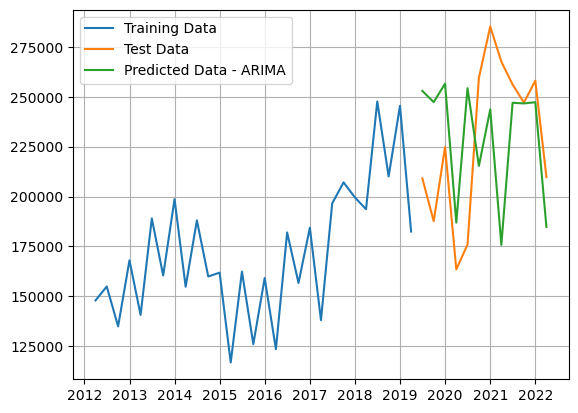

In [55]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [56]:
# Calculating RMSE & MAPE

In [57]:
print('RMSE:', np.sqrt(mean_squared_error(test.Tractor_sales, ARIMA_pred)))

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred)) / (y_true) * 100)

print('MAPE', MAPE(test.Tractor_sales, ARIMA_pred))

RMSE: 46605.78870824591
MAPE nan


# Forecasting tractor sales for next 5 years

In [59]:
results_Arima_forecast =ARIMA(df2,seasonal_order=(2,1,3,4)).fit()

In [60]:
ARIMA_forecast =results_Arima_forecast.forecast(20)

In [61]:
ARIMA_forecast

2022-06-30    248938.611087
2022-09-30    247274.650731
2022-12-31    263749.813242
2023-03-31    215433.475381
2023-06-30    247032.357711
2023-09-30    268571.623325
2023-12-31    289695.701414
2024-03-31    242325.886295
2024-06-30    262013.720684
2024-09-30    270844.258563
2024-12-31    288284.866692
2025-03-31    237150.492975
2025-06-30    264664.735320
2025-09-30    286138.543547
2025-12-31    305811.254386
2026-03-31    254333.261056
2026-06-30    275702.096177
2026-09-30    291755.386579
2026-12-31    309477.817894
2027-03-31    255311.712771
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [62]:
ARIMA_forecast=pd.DataFrame(ARIMA_forecast)

# Plot between Past data & forecasted data

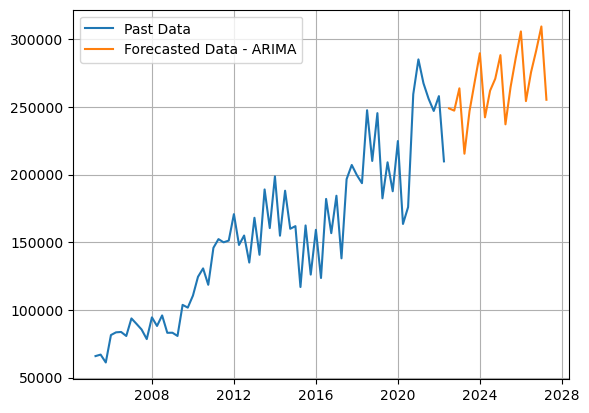

In [64]:
plt.plot(df2,label='Past Data')
plt.plot(ARIMA_forecast,label='Forecasted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Multivariate Time Series Analysis

In [65]:
from prophet import Prophet

In [66]:
df.head()

,Date,Tractor sales,GDP,"Agriculture,forestry & fishing",Seasonality,CPI General Index,M1 Rs. Million,M3 Rs. Million,Per capita GDP,Repo Rate,Purchase of Finish goods.,Foodgrains,Cereals,Pulses,Mechanization,Actual_rainfall,Deviation_from_Normal,Kharif_prices,IMD_LPA%
0,2005-03-01,65845,8836970.0,1484010.0,1.193914,105.0,6497660.0,22456530.0,29259.3,0.0630,4664.1,1651.95,1903.44,576.8,18,1132.0,-4.51,560,99.47
1,2005-06-01,66941,8192260.0,1394040.0,0.900000,110.0,8263890.0,27194930.0,32840.2,0.0625,4603.9,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
2,2005-09-01,61126,8220920.0,1130230.0,0.972246,116.6,8263890.0,27194930.0,32840.2,0.0625,3081.7,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
3,2005-12-01,81410,9266960.0,1857500.0,0.967608,118.9,8263890.0,27194930.0,32840.2,0.0625,2747.8,1651.95,1903.44,576.8,18,1190.2,0.40,570,99.47
4,2006-03-01,83395,9752300.0,1563090.0,1.193914,119.0,8263890.0,27194930.0,32840.2,0.0625,2142.8,1715.48,1967.75,597.8,21,1190.2,0.40,570,99.37


In [67]:
df.columns

Index(['Date', 'Tractor sales', 'GDP', 'Agriculture,forestry  & fishing ',
       'Seasonality', 'CPI General Index', 'M1 Rs. Million', 'M3 Rs. Million',
       'Per capita GDP ', 'Repo Rate', 'Purchase of Finish goods.',
       'Foodgrains', 'Cereals ', 'Pulses ', 'Mechanization', 'Actual_rainfall',
       'Deviation_from_Normal', 'Kharif_prices', 'IMD_LPA%'],
      dtype='object')

# Assuming below columns are necessary to forecast tractor sales

In [68]:
df1 = df[['Date', 'Tractor sales', 'GDP','CPI General Index', 'M1 Rs. Million', 'M3 Rs. Million',
       'Repo Rate', 'Purchase of Finish goods.', 'Mechanization', 'Actual_rainfall','Kharif_prices']]

In [69]:
df1.head()

,Date,Tractor sales,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices
0,2005-03-01,65845,8836970.0,105.0,6497660.0,22456530.0,0.0630,4664.1,18,1132.0,560
1,2005-06-01,66941,8192260.0,110.0,8263890.0,27194930.0,0.0625,4603.9,18,1190.2,570
2,2005-09-01,61126,8220920.0,116.6,8263890.0,27194930.0,0.0625,3081.7,18,1190.2,570
3,2005-12-01,81410,9266960.0,118.9,8263890.0,27194930.0,0.0625,2747.8,18,1190.2,570
4,2006-03-01,83395,9752300.0,119.0,8263890.0,27194930.0,0.0625,2142.8,21,1190.2,570


In [70]:
df1.tail()

,Date,Tractor sales,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices
64,2021-03-01,267503,39177252.1,156.6,47942993.5,188445777.5,0.0400,135683.9,52,1265.0,1868
65,2021-06-01,256093,32464338.8,159.8,53029930.0,204895970.0,0.0454,91976.0,52,1242.0,1940
66,2021-09-01,247042,35891782.6,162.9,53029930.0,204895970.0,0.0454,156685.2,52,1242.0,1940
67,2021-12-01,258003,38218783.0,166.1,53029930.0,204895970.0,0.0454,173926.6,52,1242.0,1940
68,2022-03-01,209777,40780250.5,166.5,53029930.0,204895970.0,0.0454,134563.1,52,1242.0,1940


In [71]:
quarters= pd.date_range(start='2/01/2005', end='4/01/2022', freq='Q')
quarters

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [72]:
df1['Time_Stamp']=pd.DataFrame(quarters)

In [73]:
df1.head()

,Date,Tractor sales,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices,Time_Stamp
0,2005-03-01,65845,8836970.0,105.0,6497660.0,22456530.0,0.0630,4664.1,18,1132.0,560,2005-03-31
1,2005-06-01,66941,8192260.0,110.0,8263890.0,27194930.0,0.0625,4603.9,18,1190.2,570,2005-06-30
2,2005-09-01,61126,8220920.0,116.6,8263890.0,27194930.0,0.0625,3081.7,18,1190.2,570,2005-09-30
3,2005-12-01,81410,9266960.0,118.9,8263890.0,27194930.0,0.0625,2747.8,18,1190.2,570,2005-12-31
4,2006-03-01,83395,9752300.0,119.0,8263890.0,27194930.0,0.0625,2142.8,21,1190.2,570,2006-03-31


In [74]:
df1.drop(['Date'],axis=1,inplace=True)
df1.head()

,Tractor sales,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices,Time_Stamp
0,65845,8836970.0,105.0,6497660.0,22456530.0,0.0630,4664.1,18,1132.0,560,2005-03-31
1,66941,8192260.0,110.0,8263890.0,27194930.0,0.0625,4603.9,18,1190.2,570,2005-06-30
2,61126,8220920.0,116.6,8263890.0,27194930.0,0.0625,3081.7,18,1190.2,570,2005-09-30
3,81410,9266960.0,118.9,8263890.0,27194930.0,0.0625,2747.8,18,1190.2,570,2005-12-31
4,83395,9752300.0,119.0,8263890.0,27194930.0,0.0625,2142.8,21,1190.2,570,2006-03-31


In [ ]:
# Renaming Tractor sales to Tractor_sales

In [75]:
df1.rename(columns = {'Tractor sales':'Tractor_sales'}, inplace = True)

In [76]:
df1.head()

,Tractor_sales,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices,Time_Stamp
0,65845,8836970.0,105.0,6497660.0,22456530.0,0.0630,4664.1,18,1132.0,560,2005-03-31
1,66941,8192260.0,110.0,8263890.0,27194930.0,0.0625,4603.9,18,1190.2,570,2005-06-30
2,61126,8220920.0,116.6,8263890.0,27194930.0,0.0625,3081.7,18,1190.2,570,2005-09-30
3,81410,9266960.0,118.9,8263890.0,27194930.0,0.0625,2747.8,18,1190.2,570,2005-12-31
4,83395,9752300.0,119.0,8263890.0,27194930.0,0.0625,2142.8,21,1190.2,570,2006-03-31


In [77]:
train_start = datetime(2012,3,31)
train_end= datetime(2019,3,31)
test_start = datetime(2019,6,30)
test_end= datetime(2022,3,31)

In [95]:
# Splitting dataset into train & test

In [78]:
df_train = df1[28:57]
df_test  = df1[58:]

In [79]:
df_train.shape

(29, 11)

In [80]:
df_test.shape

(11, 11)

In [81]:
df_train.columns

Index(['Tractor_sales', 'GDP', 'CPI General Index', 'M1 Rs. Million',
       'M3 Rs. Million', 'Repo Rate', 'Purchase of Finish goods.',
       'Mechanization', 'Actual_rainfall', 'Kharif_prices', 'Time_Stamp'],
      dtype='object')

In [96]:
# Renaming Tractor_Sales to y and Time_Stamp to ds as Prophet model requires Target variable to y & date column to be ds

In [82]:
df_train = df_train.rename(columns={'Tractor_sales':'y', 'Time_Stamp':'ds'})

In [83]:
df_train

,y,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices,ds
28,147983,23654614.0,95.7,17373940.0,73848310.0,0.066250,30239.7,29,1096.7,1080,2012-03-31
29,154962,22052234.4,98.7,18975260.0,83898190.0,0.075000,27988.8,29,1079.8,1250,2012-06-30
30,134997,21959458.8,102.1,18975260.0,83898190.0,0.075000,32032.3,29,1079.8,1250,2012-09-30
31,168069,23447672.1,104.2,18975260.0,83898190.0,0.075000,28340.9,29,1079.8,1250,2012-12-31
32,140715,24670818.7,105.7,18975260.0,83898190.0,0.075000,27365.0,31,1079.8,1250,2013-03-31
33,189020,23473963.7,107.8,20597620.0,95173860.0,0.080000,22507.2,31,1265.2,1310,2013-06-30
34,160464,23570788.7,112.4,20597620.0,95173860.0,0.080000,30731.4,31,1265.2,1310,2013-09-30
35,198687,24979973.4,115.2,20597620.0,95173860.0,0.080000,42309.7,31,1265.2,1310,2013-12-31
36,154839,25988975.6,113.8,20597620.0,95173860.0,0.080000,42628.2,33,1265.2,1310,2014-03-31
37,188074,25357505.9,115.9,22924040.0,105501680.0,0.073125,41126.9,33,1088.6,1360,2014-06-30


In [84]:
# to save a copy of the original data.
df_train['y_orig'] = df_train['y'] 

df_train['y'] = np.log(df_train['y'])

#instantiate Prophet
model_new = Prophet() 

# Adding columns to prophet model for forecasting
model_new.add_regressor('GDP',standardize=True)
model_new.add_regressor('CPI General Index',standardize=True)
model_new.add_regressor('M1 Rs. Million',standardize=True)
model_new.add_regressor('M3 Rs. Million',standardize=True)
model_new.add_regressor('Repo Rate',standardize=True)
model_new.add_regressor('Purchase of Finish goods.',standardize=True)
model_new.add_regressor('Mechanization',standardize=True)
model_new.add_regressor('Actual_rainfall',standardize=True)
model_new.add_regressor('Kharif_prices',standardize=True)

In [85]:
df_train

,y,GDP,CPI General Index,M1 Rs. Million,M3 Rs. Million,Repo Rate,Purchase of Finish goods.,Mechanization,Actual_rainfall,Kharif_prices,ds,y_orig
28,11.904853,23654614.0,95.7,17373940.0,73848310.0,0.066250,30239.7,29,1096.7,1080,2012-03-31,147983
29,11.950935,22052234.4,98.7,18975260.0,83898190.0,0.075000,27988.8,29,1079.8,1250,2012-06-30,154962
30,11.813008,21959458.8,102.1,18975260.0,83898190.0,0.075000,32032.3,29,1079.8,1250,2012-09-30,134997
31,12.032130,23447672.1,104.2,18975260.0,83898190.0,0.075000,28340.9,29,1079.8,1250,2012-12-31,168069
32,11.854492,24670818.7,105.7,18975260.0,83898190.0,0.075000,27365.0,31,1079.8,1250,2013-03-31,140715
33,12.149608,23473963.7,107.8,20597620.0,95173860.0,0.080000,22507.2,31,1265.2,1310,2013-06-30,189020
34,11.985825,23570788.7,112.4,20597620.0,95173860.0,0.080000,30731.4,31,1265.2,1310,2013-09-30,160464
35,12.199486,24979973.4,115.2,20597620.0,95173860.0,0.080000,42309.7,31,1265.2,1310,2013-12-31,198687
36,11.950141,25988975.6,113.8,20597620.0,95173860.0,0.080000,42628.2,33,1265.2,1310,2014-03-31,154839
37,12.144591,25357505.9,115.9,22924040.0,105501680.0,0.073125,41126.9,33,1088.6,1360,2014-06-30,188074


In [ ]:
# Training the model

In [86]:
model_new.fit(df_train)

00:26:37 - cmdstanpy - INFO - Chain [1] start processing
00:26:37 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
future_data = model_new.make_future_dataframe(periods=11, freq = 'Q')

In [97]:
# Creating dataframe for future data

In [88]:
df_test = df_test.rename(columns={'Tractor_sales':'y', 'Time_Stamp':'ds'})
future_data=df_test[['ds','GDP', 'CPI General Index', 'M1 Rs. Million', 'M3 Rs. Million',
       'Repo Rate', 'Purchase of Finish goods.', 'Mechanization',
       'Actual_rainfall', 'Kharif_prices' ]]

In [98]:
# Predicting the future data

In [89]:
forecast_data = model_new.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Actual_rainfall,Actual_rainfall_lower,Actual_rainfall_upper,CPI General Index,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-30,-7.533635,12.072590,12.128656,-7.536110,-7.530808,-0.132428,-0.132428,-0.132428,0.100777,...,5.515659,5.515659,5.515659,14.118952,14.118952,14.118952,0.0,0.0,0.0,12.100976
1,2019-12-31,-7.847636,12.347235,12.409470,-7.855409,-7.838563,-0.132428,-0.132428,-0.132428,0.117276,...,5.614107,5.614107,5.614107,14.610076,14.610076,14.610076,0.0,0.0,0.0,12.376547
2,2020-03-31,-8.158225,11.934500,12.002300,-8.172757,-8.140145,-0.132428,-0.132428,-0.132428,0.119951,...,5.600087,5.600087,5.600087,14.525694,14.525694,14.525694,0.0,0.0,0.0,11.967556
3,2020-06-30,-8.468814,11.964175,12.042441,-8.492211,-8.439876,-0.097138,-0.097138,-0.097138,0.129315,...,6.481369,6.481369,6.481369,13.991152,13.991152,13.991152,0.0,0.0,0.0,12.003707
4,2020-09-30,-8.782815,12.783015,12.879471,-8.817147,-8.740941,-0.097138,-0.097138,-0.097138,0.145368,...,7.476458,7.476458,7.476458,14.136914,14.136914,14.136914,0.0,0.0,0.0,12.830556
5,2020-12-31,-9.096817,13.340072,13.456492,-9.143455,-9.042977,-0.097138,-0.097138,-0.097138,0.159638,...,8.006871,8.006871,8.006871,14.487021,14.487021,14.487021,0.0,0.0,0.0,13.397075
6,2021-03-31,-9.403993,13.163874,13.305229,-9.464294,-9.337895,-0.097138,-0.097138,-0.097138,0.152503,...,7.983685,7.983685,7.983685,14.651964,14.651964,14.651964,0.0,0.0,0.0,13.231656
7,2021-06-30,-9.714581,13.368574,13.533178,-9.792109,-9.629525,-0.084047,-0.084047,-0.084047,0.166772,...,9.162840,9.162840,9.162840,13.998735,13.998735,13.998735,0.0,0.0,0.0,13.446993
8,2021-09-30,-10.028583,13.800306,13.999002,-10.118882,-9.927951,-0.084047,-0.084047,-0.084047,0.180596,...,9.745177,9.745177,9.745177,14.179269,14.179269,14.179269,0.0,0.0,0.0,13.895863
9,2021-12-31,-10.342585,14.085322,14.318240,-10.449015,-10.225251,-0.084047,-0.084047,-0.084047,0.194865,...,10.137201,10.137201,10.137201,14.406239,14.406239,14.406239,0.0,0.0,0.0,14.200856


In [90]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

,ds,yhat,yhat_lower,yhat_upper
0,2019-09-30,12.100976,12.072590,12.128656
1,2019-12-31,12.376547,12.347235,12.409470
2,2020-03-31,11.967556,11.934500,12.002300
3,2020-06-30,12.003707,11.964175,12.042441
4,2020-09-30,12.830556,12.783015,12.879471
5,2020-12-31,13.397075,13.340072,13.456492
6,2021-03-31,13.231656,13.163874,13.305229
7,2021-06-30,13.446993,13.368574,13.533178
8,2021-09-30,13.895863,13.800306,13.999002
9,2021-12-31,14.200856,14.085322,14.318240


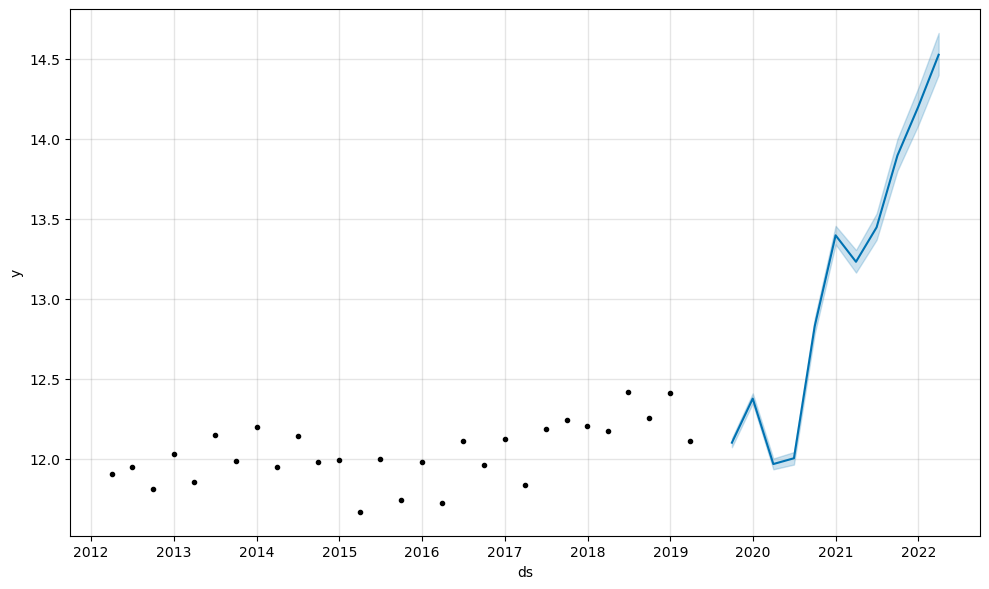

In [91]:
model_new.plot(forecast_data)
plt.show()

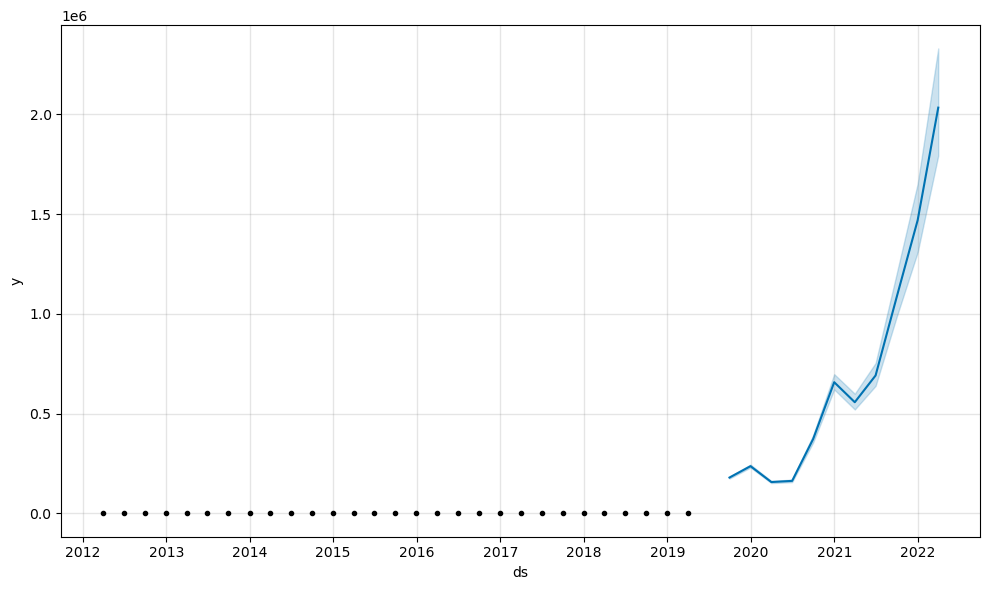

In [92]:
# Saving the original forecast data
forecast_data_orig = forecast_data 
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)
plt.show()

In [93]:
#copy the log-transformed data to another column
df_train['y_log']=df_train['y'] 
df_train['y']=df_train['y_orig']

In [94]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'